<h2>Parkinson's Disease Detection For Begineers Using XGBoost</h2>

XGBoost is a machine learning algorithm that has been used  by many winner of machine learning competions because of its speed. It is based on the concept of decision trees.

In [106]:
#importing all the necessary libraries to be used in our code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier

In [107]:
#importing the parkinsons data downloaded from UCI machine learning repository
path = 'parkinsons.data'
df = pd.read_csv(path)
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [108]:
df.info() #checking the information of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [110]:
df.shape #Cecking th shape of of data i.e rows and column

(195, 24)

In [111]:
df.describe() #Getting the statistical summary of features in our dataset

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


<h2>EDA (Exploratory Data Analysis)</h2>


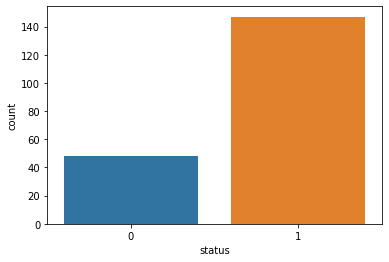

In [112]:
sns.countplot(df['status']) #ploting a count of the target variable with seaborn
plt.show()

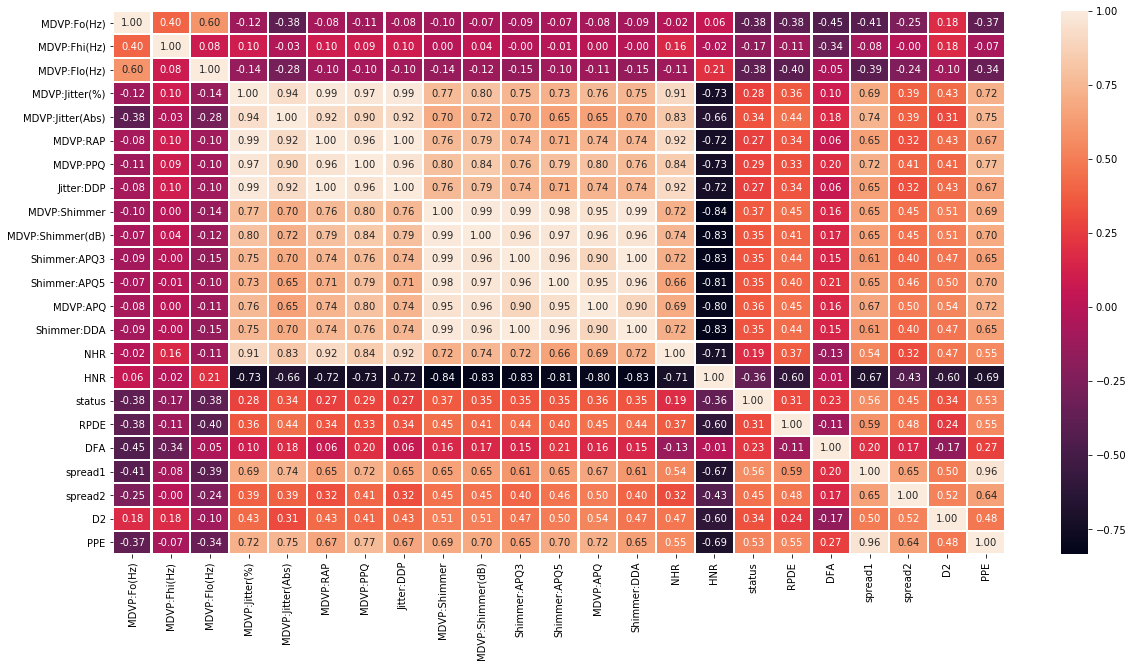

In [113]:
#Visualization is always the best way to explain figures.
#Using seaborn heatmap for plotting the correlation of the features 
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,fmt=".2f",linewidths="1.2")
plt.show()

<Figure size 1080x720 with 0 Axes>

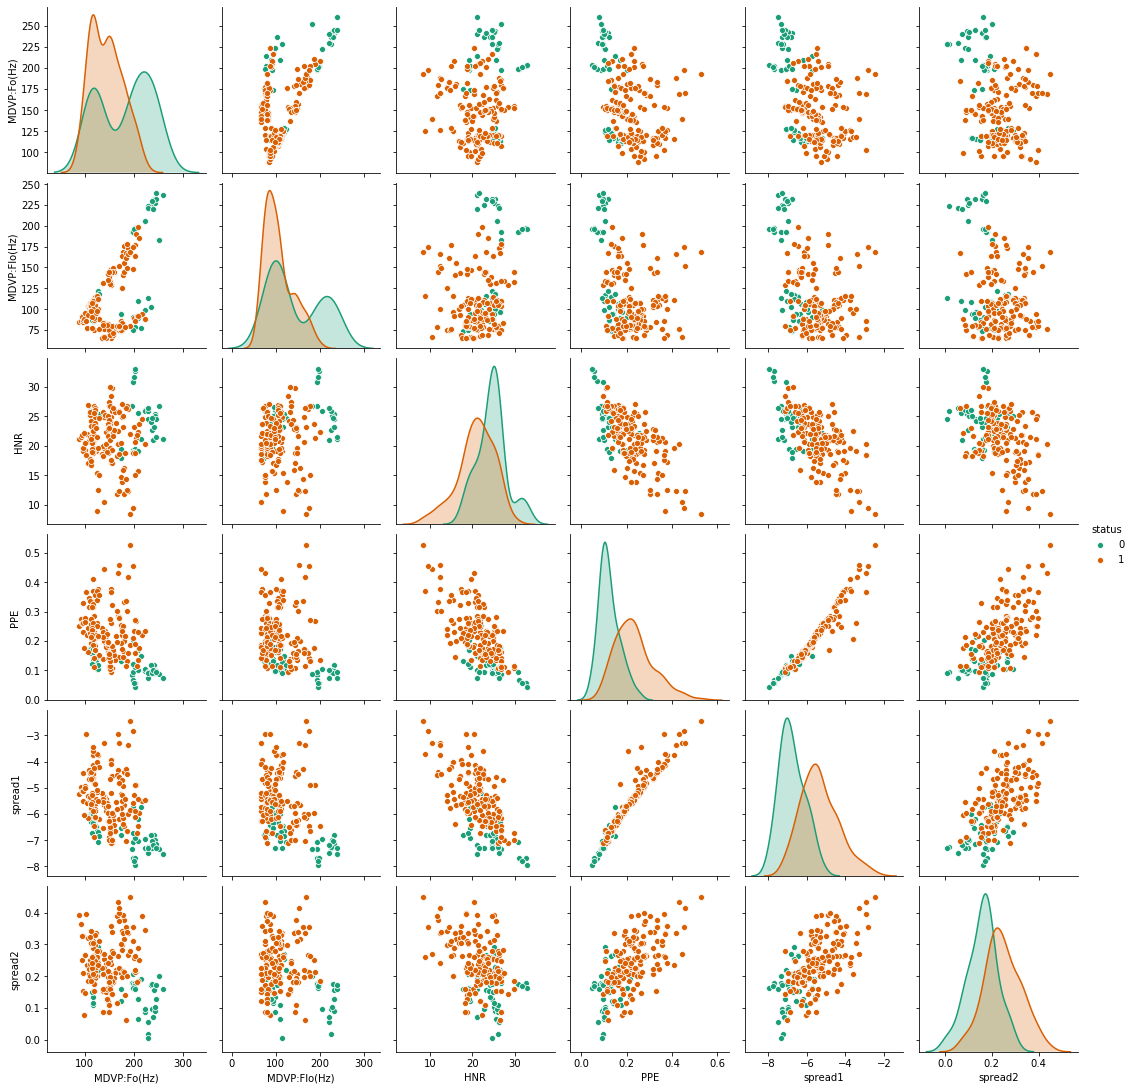

In [114]:
#Using pair plot to showing the relationship between variables that are highly correlected (+ve and -ve) with the target (status)
plt.figure(figsize = (15,10))
sns.pairplot(df, vars=['MDVP:Fo(Hz)','MDVP:Flo(Hz)','HNR','PPE','spread1','spread2'],hue='status',palette='Dark2')
plt.savefig('Relationship')
plt.show()

<h2>Selecting Features and Scaling Them</h2>

In [115]:
#Dividing our dataset into X (features) and y (Target)
X = np.array(df.drop(['name','status'], axis = 1))
y = np.array(df['status'])
print(f'X shape: {X.shape} Y Shape: {y.shape}')

X shape: (195, 22) Y Shape: (195,)


In [116]:
#scaling the features so they are of the same scale. The target doesnt need to be scaled
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

<h2>Perfroming Cross Validation</h2>
Cross validation helps to ensure that our model is not over fitting the data

In [117]:
#writting a function for performing cross validation 
def crossValidate(model):
    #Using StratifiedKFold to ensure that the divided folds are shuffled
    strat_k_fold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
    
    #Getting just specific scores for perfromance evualation.
    scoring = ["accuracy","precision","recall","f1","roc_auc"]
    cv = cross_validate(model, scaled_X, y, cv = strat_k_fold, scoring = scoring)
    
    '''
    for score in cv:
        print(f'{score}: {round(cv[score].mean(),3)}')
    '''
    
    result = [round(cv[score].mean(),3) for score in cv]
    return result
    

<h2>Instantiate The Model To Be Used</h2>

In [120]:
model = XGBClassifier()
result = crossValidate(model)#passing the model to the cross validate function

In [92]:
result[2:]

[0.933, 0.941, 0.973, 0.956, 0.975]

Text(0.5, 1.0, 'Model Performance')

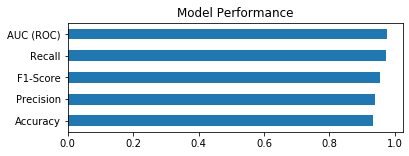

In [124]:
#Giving a plot of the performance metrics used
plt.figure(figsize = (6,2))
model_preformance = pd.Series(data=result[2:], 
        index=['Accuracy','Precision','Recall','F1-Score','AUC (ROC)'])
model_preformance.sort_values().plot.barh()
plt.title('Model Performance')